In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from IPython.display import Audio
import sys
sys.path.append("..")
import signal_processing as sp
import importlib as imp
imp.reload(sp)

SR = 44100

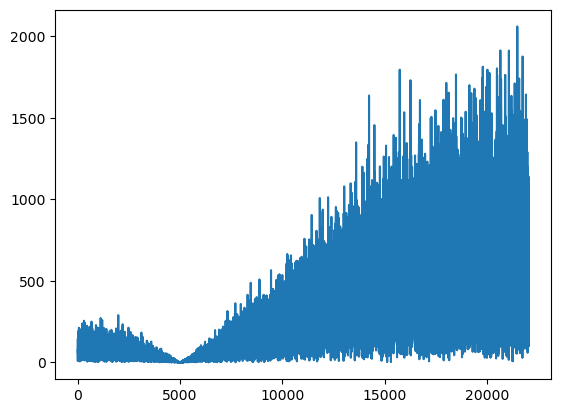

In [147]:
# BiQuad filter definition using perry cook book section 3.10
noise = np.random.normal(0,1,SR)
rp,rz = 0.0001,1
fp,fz = 1000,5000
B = [1,-2*rz*np.cos(2*np.pi*fz/SR),rz**2]
A = [1,-2*rp*np.cos(2*np.pi*fp/SR),rp**2]
output = sp.filter_sound(noise,B,A,SR)
plt.plot(np.abs(np.fft.fft(output))[0:len(output)//2])
Audio(output,rate=SR,autoplay=True)

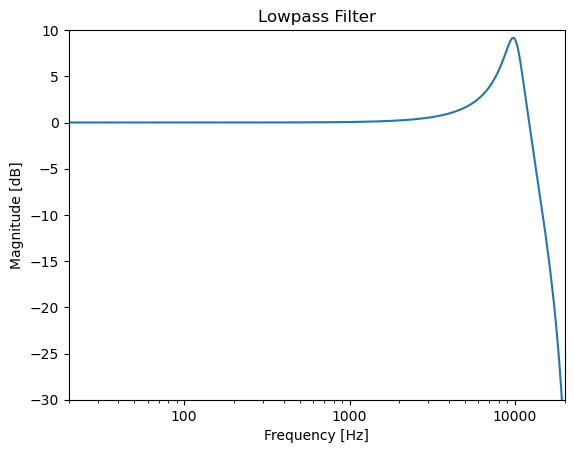

In [164]:
# LP FILTER
Fs = SR
f0 = 10000
Q = 4*0.707
w0 = 2*np.pi*f0/Fs
alpha = np.sin(w0)/(2*Q)
B = [(1-np.cos(w0))/2,1-np.cos(w0),(1-np.cos(w0))/2]
A = [1+alpha,-2*np.cos(w0),1-alpha]

sp.plot_log_freq_response(B, A, 'Lowpass Filter', ylim=(-30, 10))



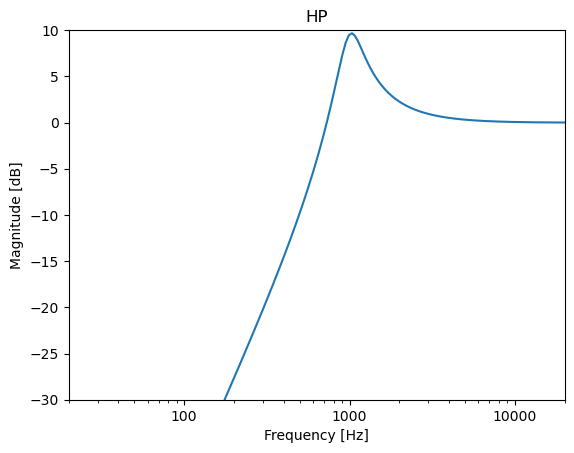

In [176]:
# HP FILTER
Fs = SR
f0 = 1000
Q = 3
w0 = 2*np.pi*f0/Fs
alpha = np.sin(w0)/(2*Q)
B = [(1+np.cos(w0))/2,-1-np.cos(w0),(1+np.cos(w0))/2]
A = [1+alpha,-2*np.cos(w0),1-alpha]

sp.plot_log_freq_response(B, A, 'HP', ylim=(-30, 10))


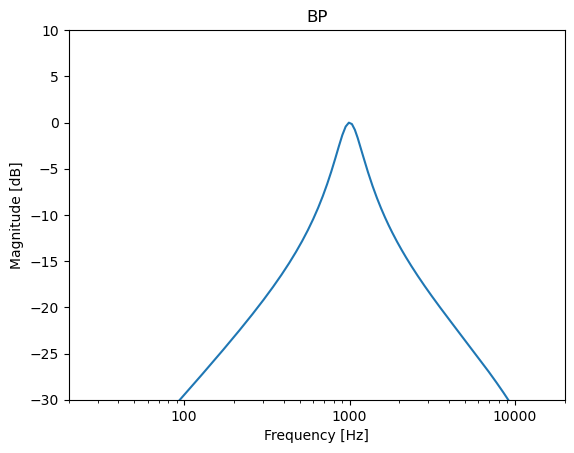

In [175]:
# BP FILTER
Fs = SR
f0 = 1000
Q = 3
w0 = 2*np.pi*f0/Fs
alpha = np.sin(w0)/(2*Q)
B = [alpha,0,-alpha]
A = [1+alpha,-2*np.cos(w0),1-alpha]

sp.plot_log_freq_response(B, A, 'BP', ylim=(-30, 10))


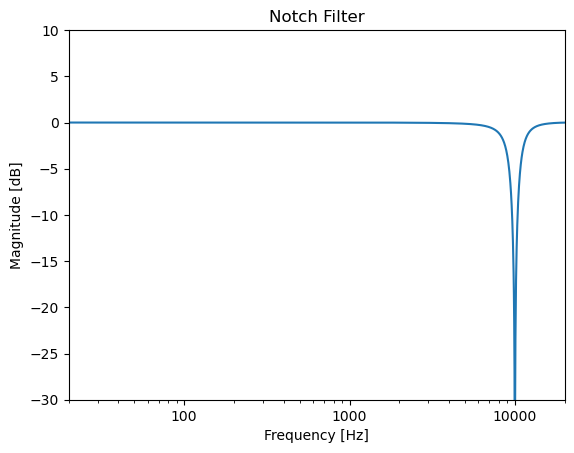

In [178]:
# NOTCH FILTER
Fs = SR
f0 = 10000
Q = 3
w0 = 2*np.pi*f0/Fs
alpha = np.sin(w0)/(2*Q)
B = [1,-2*np.cos(w0),1]
A = [1+alpha,-2*np.cos(w0),1-alpha]

sp.plot_log_freq_response(B, A, 'Notch Filter', ylim=(-30, 10))


### Using the Filters Module

/tmp/ipykernel_87184/3437990593.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx (w, 20 * np.log10 (np.abs (H)))


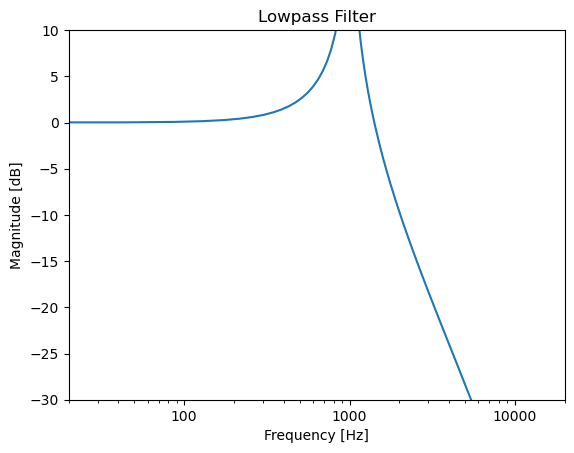

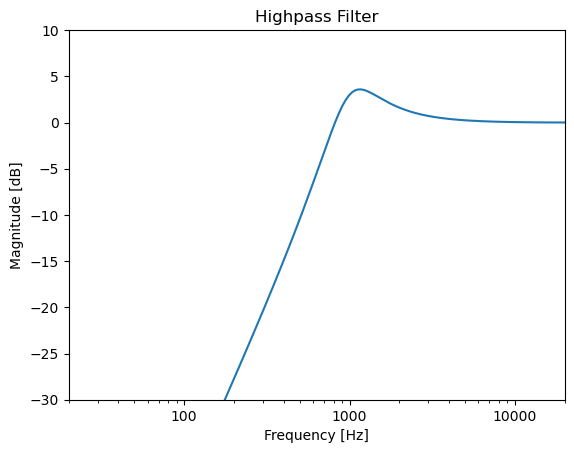

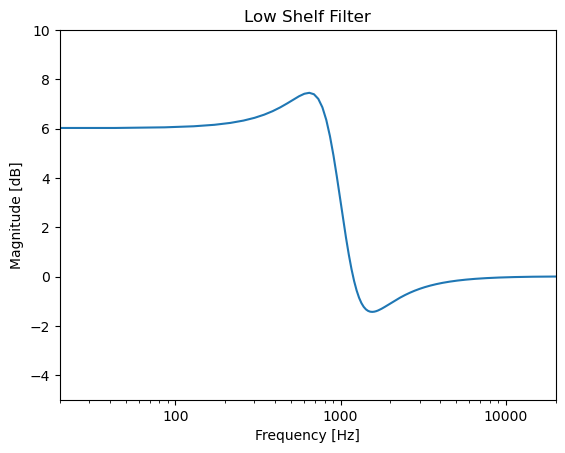

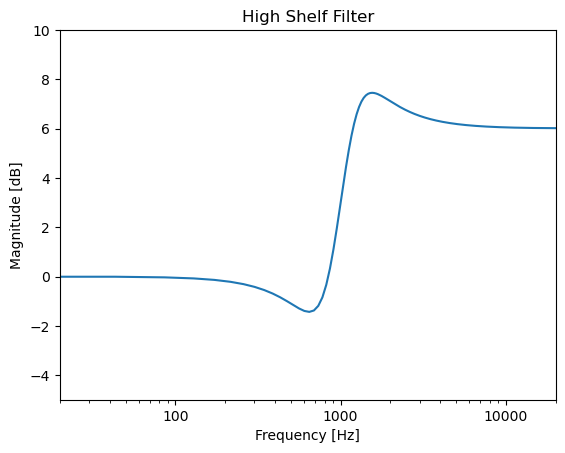

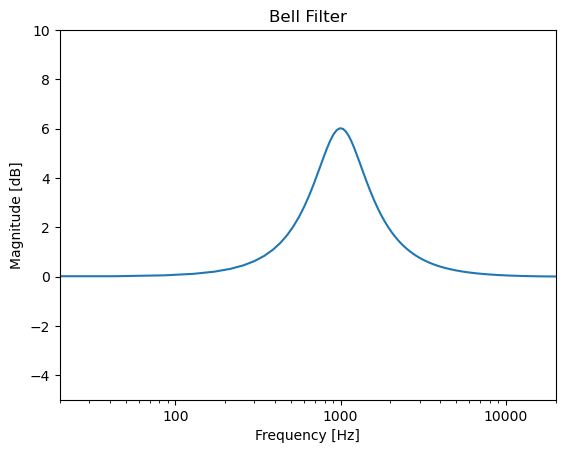

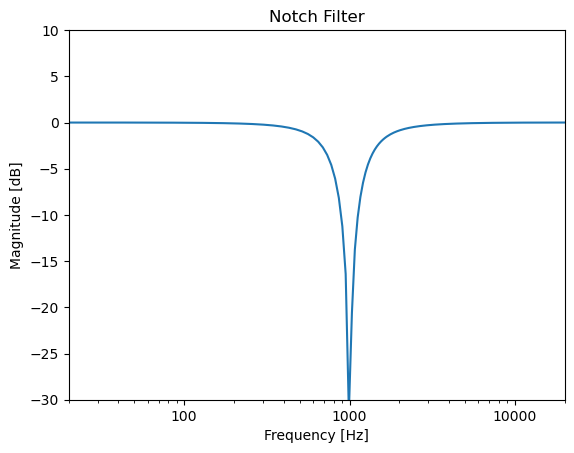

In [ ]:
fs = SR
b, a = filters.calcCoefsLPF2 (1000, 10, fs)
plotFilter (b, a, 'Lowpass Filter', ylim=(-30, 10))

b, a = filters.calcCoefsHPF2 (1000, 0.707*2, fs)
plotFilter (b, a, 'Highpass Filter', ylim=(-30, 10))

b, a = filters.calcCoefsLowShelf (1000, 0.707*2, 2, fs)
plotFilter (b, a, 'Low Shelf Filter', ylim=(-5, 10))

b, a = filters.calcCoefsHighShelf (1000, 0.707*2, 2, fs)
plotFilter (b, a, 'High Shelf Filter', ylim=(-5, 10))

b, a = filters.calcCoefsBell (1000, 0.707*2, 2, fs)
plotFilter (b, a, 'Bell Filter', ylim=(-5, 10))

b, a = filters.calcCoefsNotch (1000, 0.707*2, fs)
plotFilter (b, a, 'Notch Filter', ylim=(-30, 10))